### Conformal prediction for classification

Much of this notebook is from https://github.com/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-aps.ipynb

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
!pip install -U --no-cache-dir gdown --pre

In [2]:
# Load cached data
if not os.path.exists("../data/imagenet"):
    os.system("gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz")
    os.system("tar -xf ../data.tar.gz -C ../")
    os.system("rm ../data.tar.gz")
if not os.path.exists("../data/imagenet/human_readable_labels.json"):
    from urllib.request import urlretrieve
    urlretrieve("https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json","../data/imagenet/human_readable_labels.json")

data = np.load("../data/imagenet/imagenet-resnet152.npz")
example_paths = os.listdir("../data/imagenet/examples")
smx = data["smx"]
labels = data["labels"].astype(int)

In [5]:
smx[0,:]
labels[0]

0

In [6]:
# Problem setup
n = 1000  # number of calibration points
alpha = 0.1  # 1-alpha is the desired coverage (0.9 coverage)

In [7]:
# Split the softmax scores into calibration and validation sets (save the shuffling)
idx = np.array([1] * n + [0] * (smx.shape[0] - n)) > 0
np.random.shuffle(idx)
cal_smx, val_smx = smx[idx, :], smx[~idx, :]
cal_labels, val_labels = labels[idx], labels[~idx]

In [8]:
# get indices of sorted softmax (ascending)
cal_pi = cal_smx.argsort(axis=1)

# reverse, so descending
cal_pi = cal_pi[:, ::-1] 

In [9]:
# order the softmax scores 
cal_srt = np.take_along_axis(cal_smx, cal_pi, axis=1)

# take cumulative sum
cal_srt = cal_srt.cumsum(axis=1)

In [10]:
cal_scores = np.take_along_axis(cal_srt, cal_pi.argsort(axis=1), axis=1)[
    range(n), cal_labels
]

# Get the score quantile
qhat = np.quantile(
    cal_scores, np.ceil((n + 1) * (1 - alpha)) / n, interpolation="higher"
)
# Deploy (output=list of length n, each element is tensor of classes)
val_pi = val_smx.argsort(1)[:, ::-1]
val_srt = np.take_along_axis(val_smx, val_pi, axis=1).cumsum(axis=1)
prediction_sets = np.take_along_axis(val_srt <= qhat, val_pi.argsort(axis=1), axis=1)

In [11]:
# Calculate empirical coverage
empirical_coverage = prediction_sets[
    np.arange(prediction_sets.shape[0]), val_labels
].mean()
print(f"The empirical coverage is: {empirical_coverage}")

The empirical coverage is: 0.8913877551020408


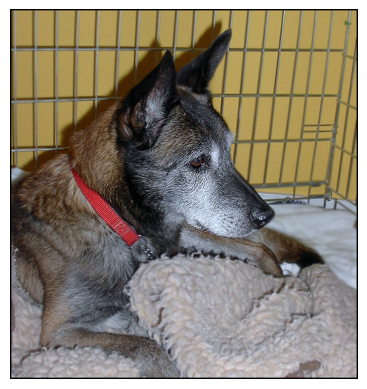

The prediction set is: ['great white shark', 'hen', 'bulbul', 'jay', 'chickadee', 'American dipper', 'leatherback sea turtle', 'mud turtle', 'Nile crocodile', 'American alligator', 'triceratops', 'eastern hog-nosed snake', 'Saharan horned viper', 'southern black widow', 'tick', 'grey parrot', 'wallaby', 'wombat', 'Dungeness crab', 'American lobster', 'spiny lobster', 'crayfish', 'common gallinule', 'Chihuahua', 'toy terrier', 'Rhodesian Ridgeback', 'Afghan Hound', 'Bloodhound', 'Bluetick Coonhound', 'Black and Tan Coonhound', 'Redbone Coonhound', 'Irish Wolfhound', 'Italian Greyhound', 'Whippet', 'Ibizan Hound', 'Norwegian Elkhound', 'Saluki', 'Scottish Deerhound', 'Weimaraner', 'Staffordshire Bull Terrier', 'American Staffordshire Terrier', 'Bedlington Terrier', 'Border Terrier', 'Kerry Blue Terrier', 'Irish Terrier', 'Norfolk Terrier', 'Norwich Terrier', 'Wire Fox Terrier', 'Lakeland Terrier', 'Airedale Terrier', 'Cairn Terrier', 'Australian Terrier', 'Boston Terrier', 'Miniature Sch

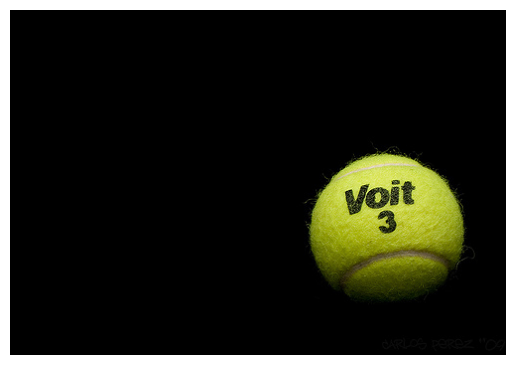

The prediction set is: ['tennis ball']


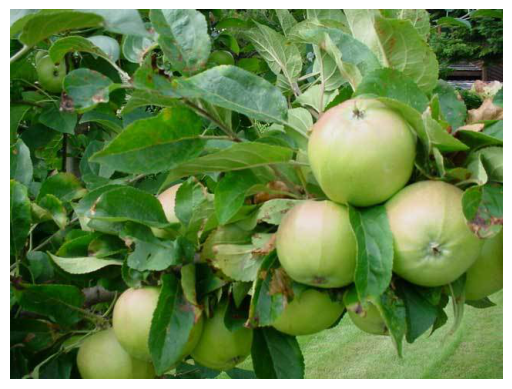

The prediction set is: ['great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'American robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'American dipper', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'axolotl', 'American bullfrog', 'tree frog', 'tailed frog', 'loggerhead sea turtle', 'leatherback sea turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'green iguana', 'Carolina anole', 'desert grassland whiptail lizard', 'agama', 'frilled-necked lizard', 'alligator lizard', 'European green lizard', 'chameleon', 'Komodo dragon', 'American alligator', 'triceratops', 'worm snake', 'eastern hog-nosed snake', 'smooth green snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'African rock python', 'Indian cobra', 'green mamba', 'Saharan horned viper', 'eastern diamondback rattlesnake', 'harvestman', 'yellow garden spi

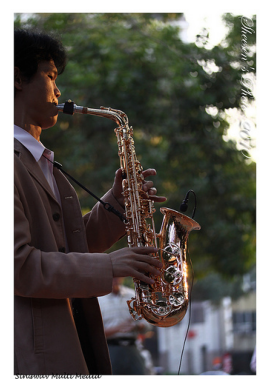

The prediction set is: ['accordion', 'banjo', 'bassoon', 'cornet', 'flute', 'French horn', 'microphone', 'oboe', 'saxophone', 'stage', 'trombone']


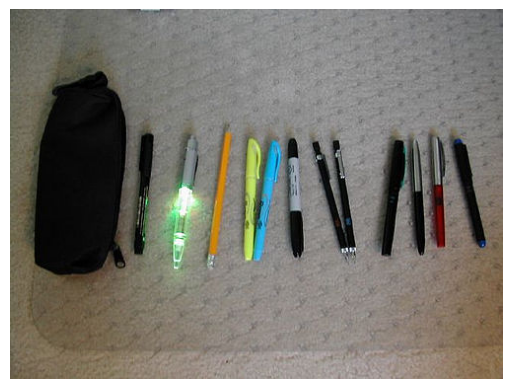

The prediction set is: ['jay', 'agama', 'trilobite', 'tick', 'centipede', 'grey parrot', 'macaw', 'slug', 'fiddler crab', 'common gallinule', 'Pekingese', 'Shih Tzu', 'Papillon', 'toy terrier', 'Redbone Coonhound', 'West Highland White Terrier', 'Schipperke', 'Groenendael', 'Shetland Sheepdog', 'collie', 'Entlebucher Sennenhund', 'Samoyed', 'Pomeranian', 'Keeshond', 'Pembroke Welsh Corgi', 'tabby cat', 'tiger cat', 'Egyptian Mau', 'ground beetle', 'dung beetle', 'rhinoceros beetle', 'leafhopper', 'dragonfly', 'damselfly', 'sea urchin', 'armadillo', 'garfish', 'abacus', 'accordion', 'analog clock', 'backpack', 'ballpoint pen', 'Band-Aid', 'banjo', 'baseball', 'bassoon', 'beaker', 'bib', 'ring binder', 'bolo tie', 'bookcase', 'bookstore', 'bow', 'bow tie', 'broom', 'bucket', 'buckle', 'cauldron', 'candle', 'can opener', 'tool kit', 'carton', 'cassette', 'cassette player', 'CD player', 'mobile phone', 'chain', 'chime', 'Christmas stocking', 'cleaver', 'cloak', 'coffee mug', 'coil', 'compu

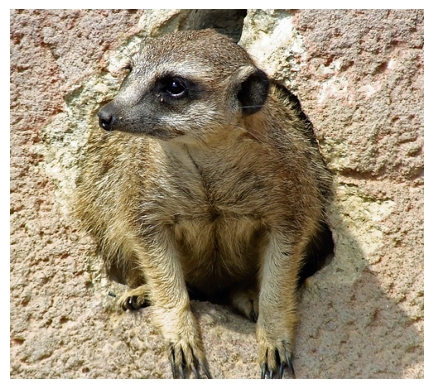

The prediction set is: ['wallaby', 'hyena', 'mongoose', 'meerkat', 'marmot', 'badger', 'ring-tailed lemur']


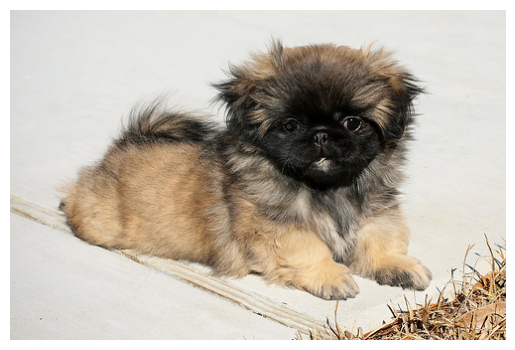

The prediction set is: ['Japanese Chin', 'Pekingese', 'Shih Tzu', 'Lhasa Apso', 'Tibetan Mastiff', 'Affenpinscher', 'pug', 'Pomeranian', 'Keeshond', 'Griffon Bruxellois', 'Persian cat']


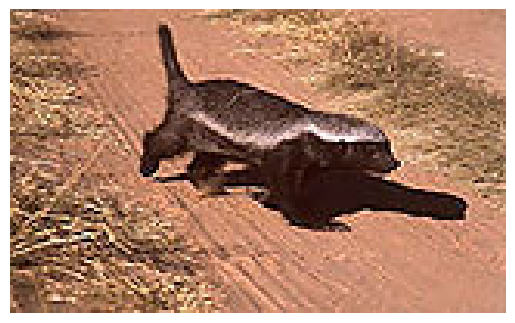

The prediction set is: ['tench', 'great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', 'cock', 'hen', 'ostrich', 'brambling', 'magpie', 'American dipper', 'kite', 'vulture', 'great grey owl', 'fire salamander', 'smooth newt', 'newt', 'spotted salamander', 'axolotl', 'American bullfrog', 'tree frog', 'tailed frog', 'loggerhead sea turtle', 'leatherback sea turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'green iguana', 'desert grassland whiptail lizard', 'agama', 'frilled-necked lizard', 'alligator lizard', 'Gila monster', 'chameleon', 'Komodo dragon', 'Nile crocodile', 'American alligator', 'triceratops', 'worm snake', 'ring-necked snake', 'eastern hog-nosed snake', 'kingsnake', 'garter snake', 'vine snake', 'night snake', 'boa constrictor', 'African rock python', 'Indian cobra', 'green mamba', 'sea snake', 'Saharan horned viper', 'eastern diamondback rattlesnake', 'sidewinder', 'trilobite', 'harvestman', 'scorpion', 'yellow garden spider', 'barn spid

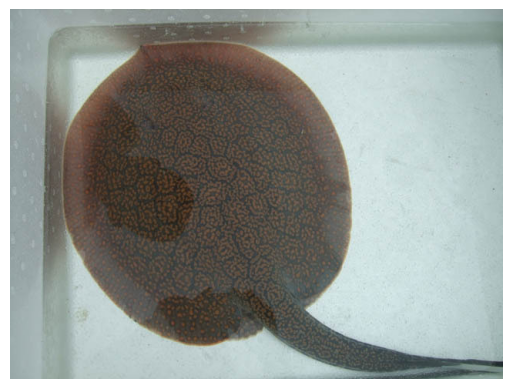

The prediction set is: ['electric ray', 'stingray']


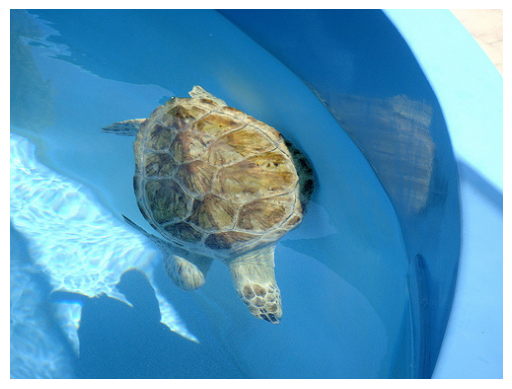

The prediction set is: ['loggerhead sea turtle', 'leatherback sea turtle', 'terrapin', 'box turtle']


In [29]:
# Show some examples
with open("../data/imagenet/human_readable_labels.json") as f:
    label_strings = np.array(json.load(f))

example_paths = os.listdir("../data/imagenet/examples")
for i in range(10):
    rand_path = np.random.choice(example_paths)
    img = imread("../data/imagenet/examples/" + rand_path)
    img_index = int(rand_path.split(".")[0])
    img_pi = smx[img_index].argsort()[::-1]
    img_srt = np.take_along_axis(smx[img_index], img_pi, axis=0).cumsum()
    prediction_set = np.take_along_axis(img_srt <= qhat, img_pi.argsort(), axis=0)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print(f"The prediction set is: {list(label_strings[prediction_set])}")